### **KNN**

In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('iris.csv', skiprows=0)
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
117,118,7.7,3.8,6.7,2.2,Iris-virginica
108,109,6.7,2.5,5.8,1.8,Iris-virginica
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
9,10,4.9,3.1,1.5,0.1,Iris-setosa
132,133,6.4,2.8,5.6,2.2,Iris-virginica
124,125,6.7,3.3,5.7,2.1,Iris-virginica
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
30,31,4.8,3.1,1.6,0.2,Iris-setosa
87,88,6.3,2.3,4.4,1.3,Iris-versicolor


In [2]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='median', axis=0)
imputer = imputer.fit(df.iloc[:,:-1])
imputed_data = imputer.transform(df.iloc[:,:-1].values)
df.iloc[:,:-1] = imputed_data

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null float64
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null object
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


In [4]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [0]:
from sklearn.preprocessing import LabelEncoder
class_label_encoder = LabelEncoder()

df.iloc[:,-1] = class_label_encoder.fit_transform(df.iloc[:,-1])

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.0,5.1,3.5,1.4,0.2,0
1,2.0,4.9,3.0,1.4,0.2,0
2,3.0,4.7,3.2,1.3,0.2,0
3,4.0,4.6,3.1,1.5,0.2,0
4,5.0,5.0,3.6,1.4,0.2,0


In [7]:
df.var()

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Species             0.675322
dtype: float64

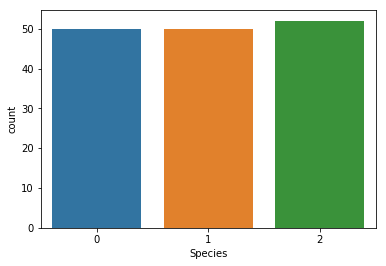

In [8]:
sns.countplot(x=df["Species"])

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


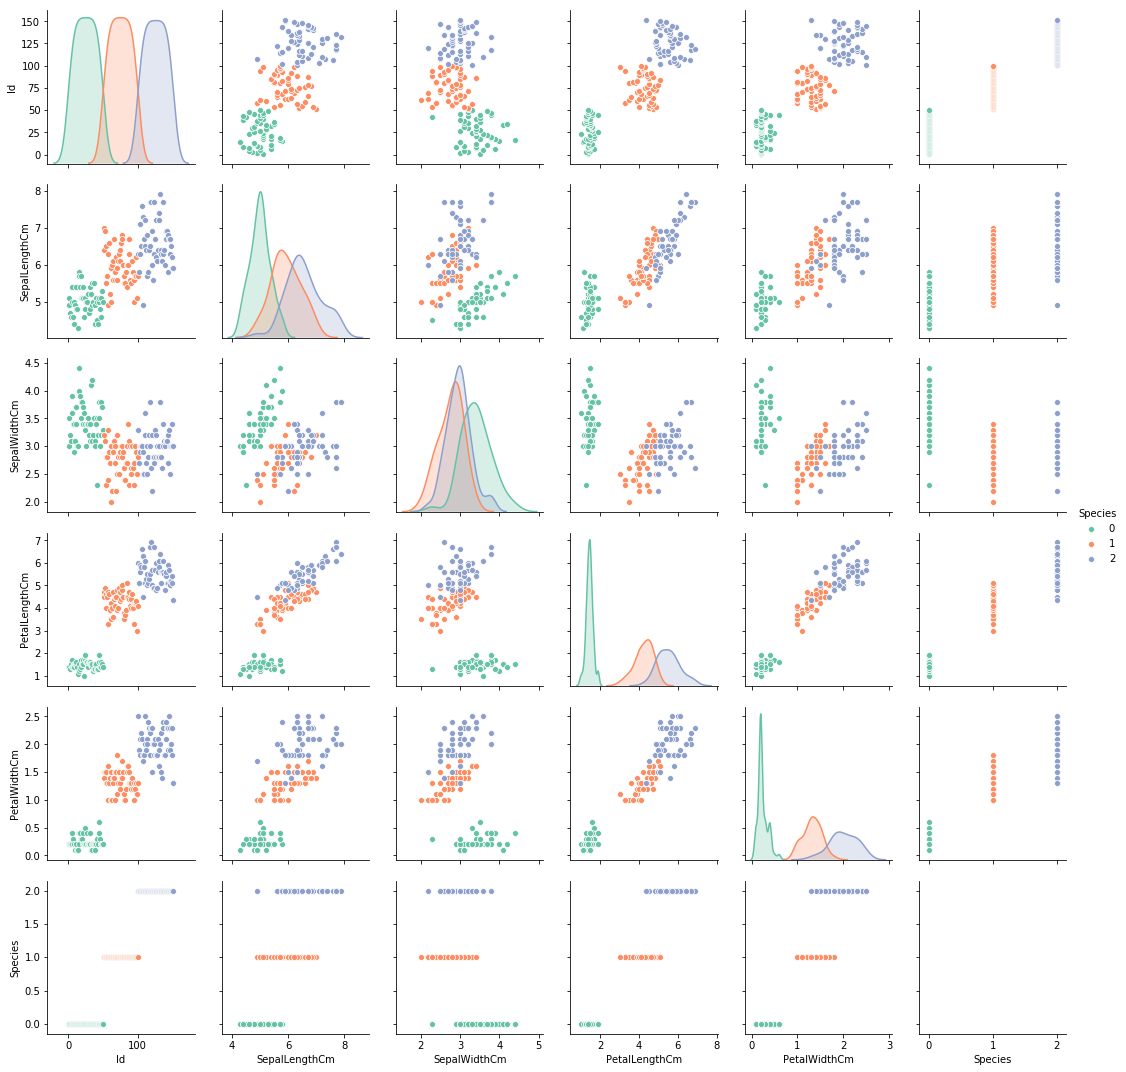

In [9]:
import matplotlib.pyplot as plt
sns.pairplot(df[:-1],hue="Species",palette="Set2")
plt.show()

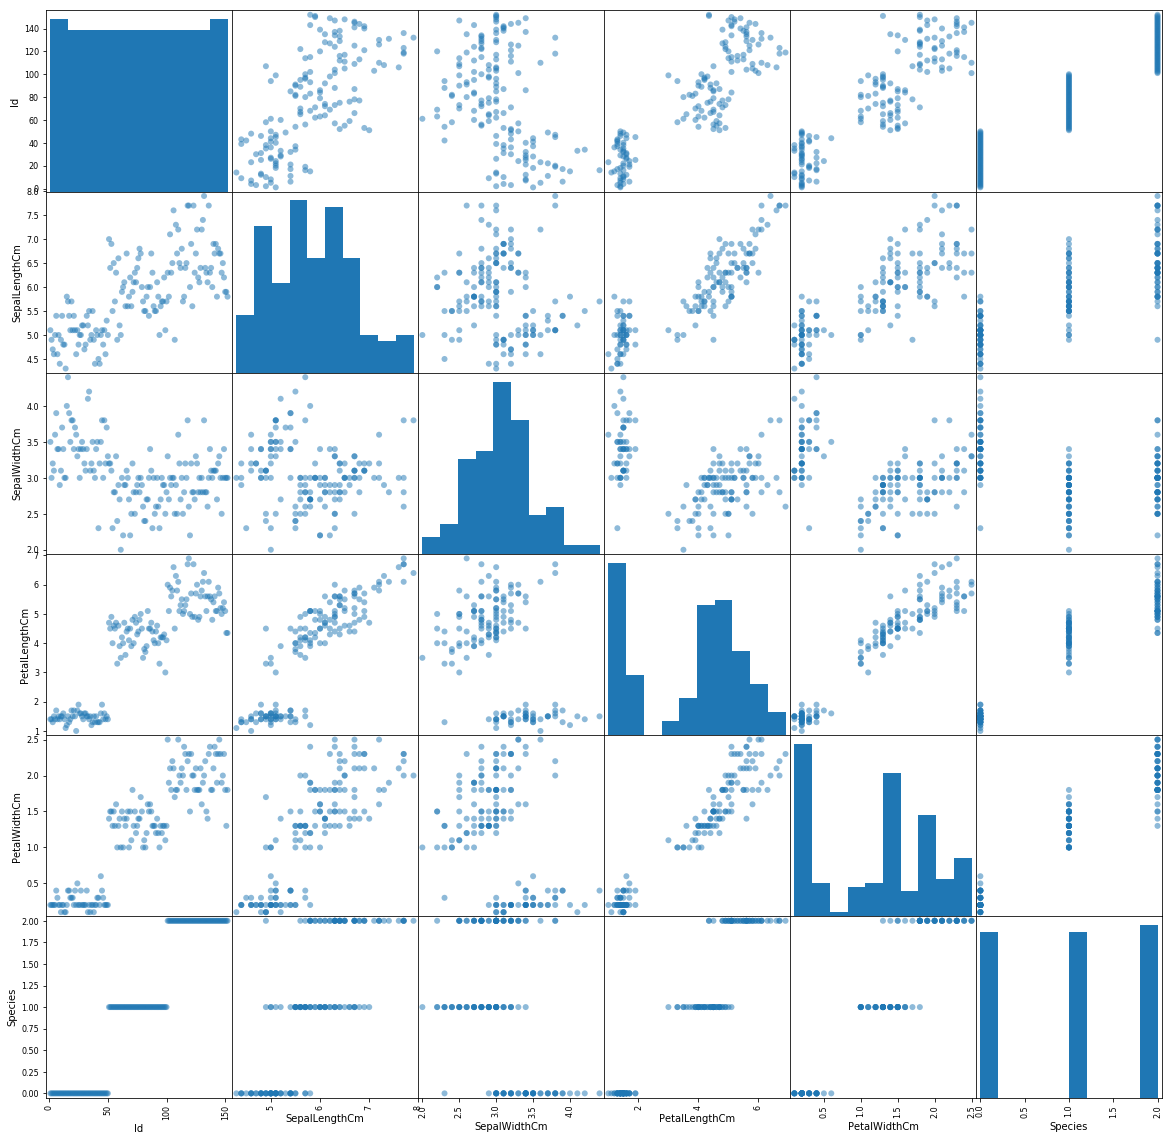

In [10]:
splt = pd.plotting.scatter_matrix(df, figsize=(20, 20), marker='o')

In [0]:
from sklearn.model_selection import train_test_split

# Transform data into features and target
X = df.iloc[:, 1:5]
y = df['Species']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [12]:
print(X_train.shape)
print(y_train.shape)

(121, 4)
(121,)


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [14]:
k = [3,5,9]

for x in k:
  knn = KNeighborsClassifier(n_neighbors = x)

  # fitting the model
  knn.fit(X_train, y_train)

  # predict the response
  y_pred = knn.predict(X_test)

  # evaluate accuracy
  print(accuracy_score(y_test, y_pred))

0.9354838709677419
0.967741935483871
0.9032258064516129


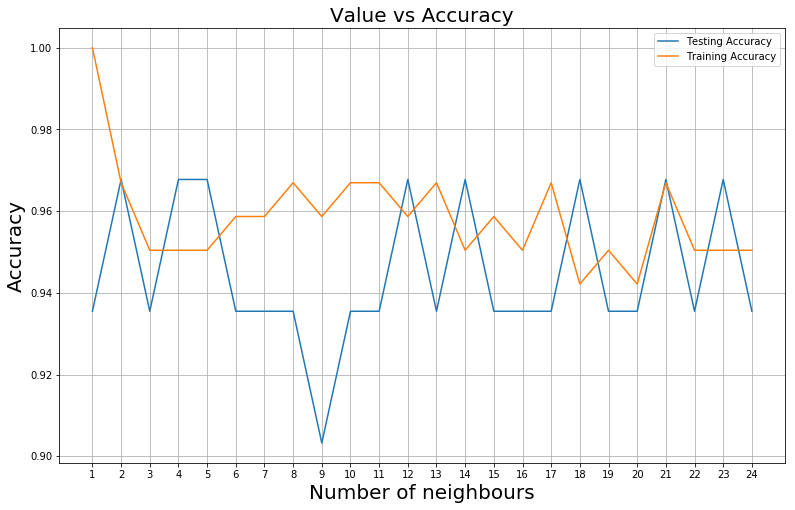

Best accuracy is 0.967741935483871 with K=2


In [15]:
import numpy as np
neig=np.arange(1,25)
train_accuracy=[]
test_accuracy=[]
ac_scores = []

#Loop over different values of k
for i,k in enumerate(neig):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))
    y_pred = knn.predict(X_test)
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)
    
    
MSE = [1 - x for x in ac_scores]
    
plt.figure(figsize=[13,8])
plt.plot(neig,test_accuracy,label="Testing Accuracy")
plt.plot(neig,train_accuracy,label="Training Accuracy")
plt.legend()
plt.title("Value vs Accuracy",fontsize=20)
plt.xlabel("Number of neighbours",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.xticks(neig)
plt.grid()
plt.show()
print("Best accuracy is {} with K={}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

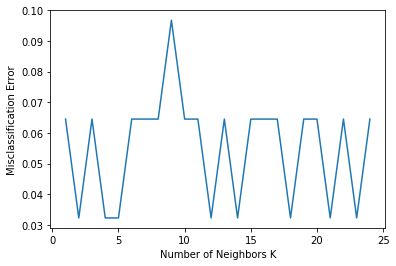

In [16]:
# plot misclassification error vs k
plt.plot(neig, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

## **Naive Bias**

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

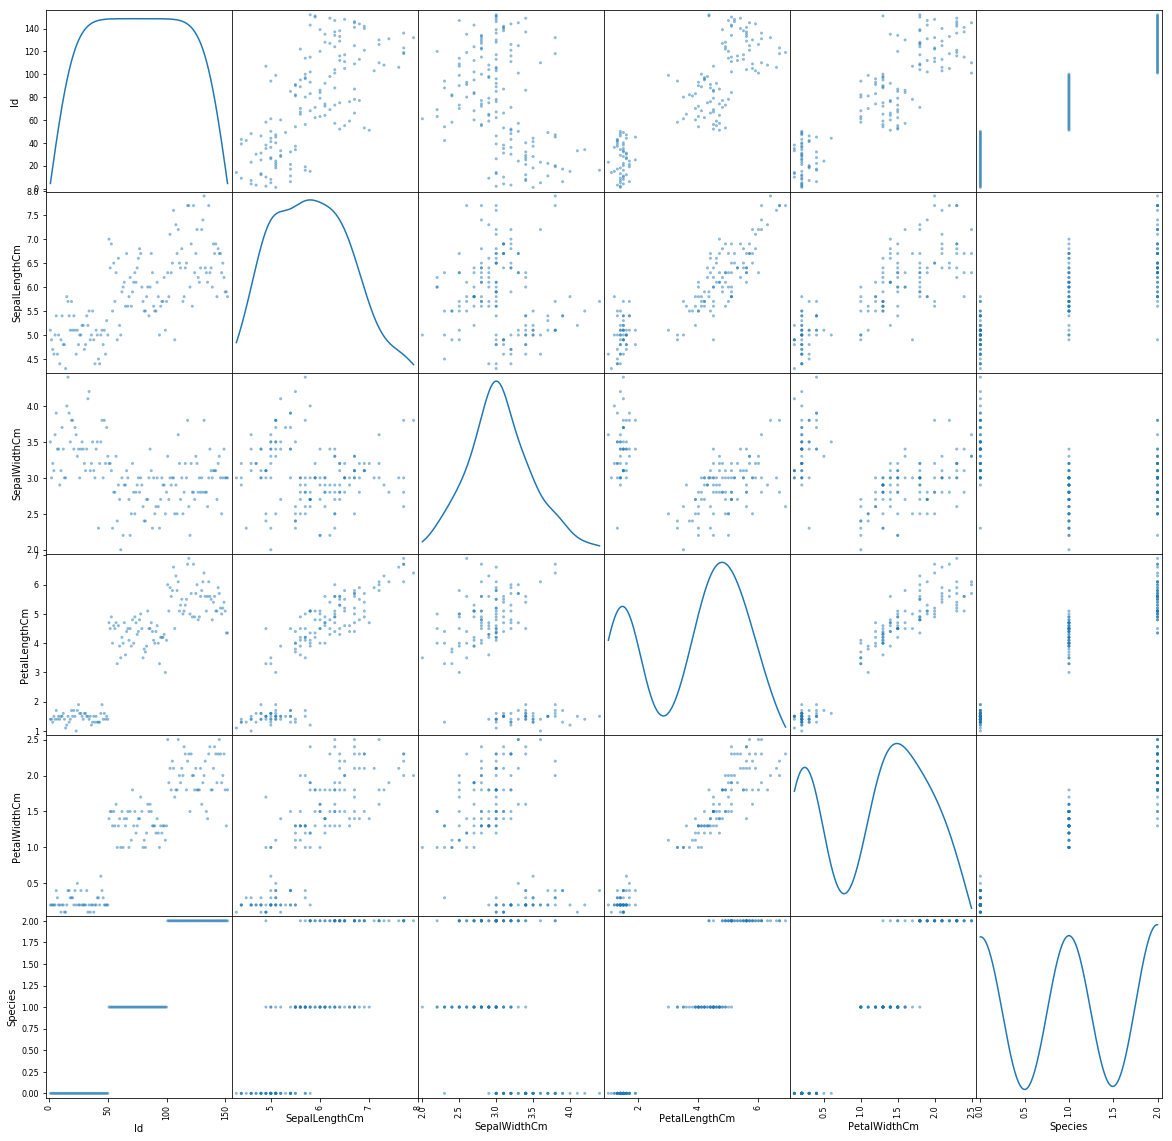

In [18]:
spd = pd.plotting.scatter_matrix(df, figsize=(20,20), diagonal="kde")

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=22)

In [20]:
naiveClassifier=GaussianNB()
naiveClassifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = naiveClassifier.predict(X_test)

In [22]:
naiveClassifier.score(X_train,y_train)

0.9338842975206612

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0 11  0]
 [ 0  0 10]]


In [24]:
#finding accuracy from the confusion matrix.
a = cm.shape
correctPrediction = 0
falsePrediction = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            correctPrediction +=cm[row,c]
        else:
            falsePrediction += cm[row,c]
print('Correct predictions: ', correctPrediction)
print('False predictions', falsePrediction)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', correctPrediction/(cm.sum()))

Correct predictions:  31
False predictions 0


Accuracy of the Naive Bayes Clasification is:  1.0


In [25]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



### **SVM**

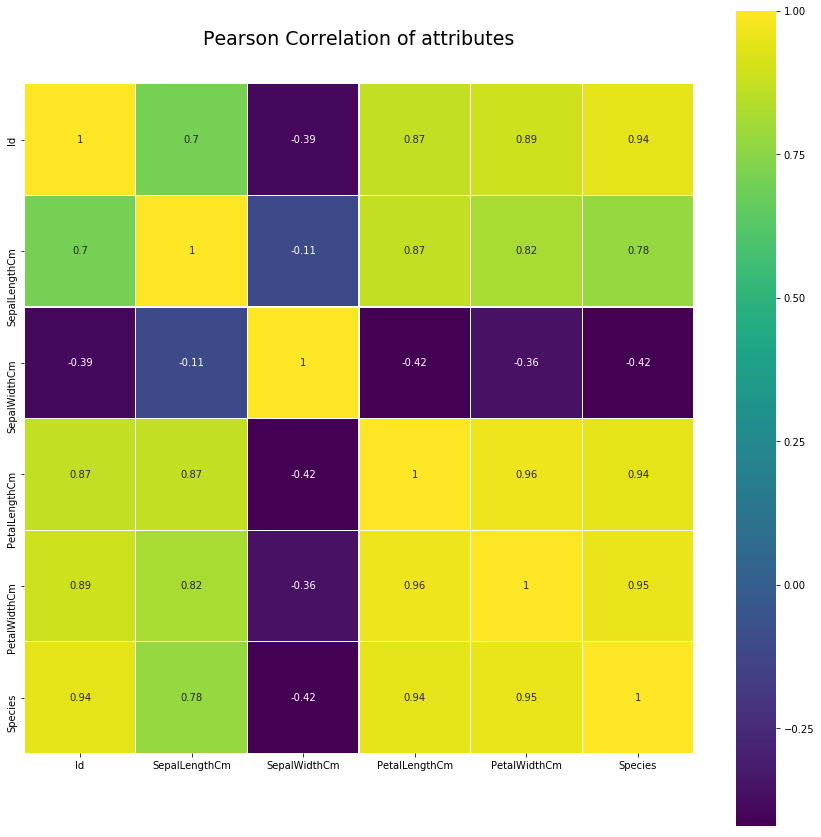

In [26]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
#There is no strong correlation between any two variables.
#There is no strong correlation between any independent variable and class variable.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=22)

In [28]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.96
Accuracy on test set: 1.00


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [30]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.92
Accuracy on test set: 0.94


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [31]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.959
Accuracy on test set: 0.968


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
